In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
import seaborn as sns
from IPython.display import Image

# Proteins are complex macrochemical structures

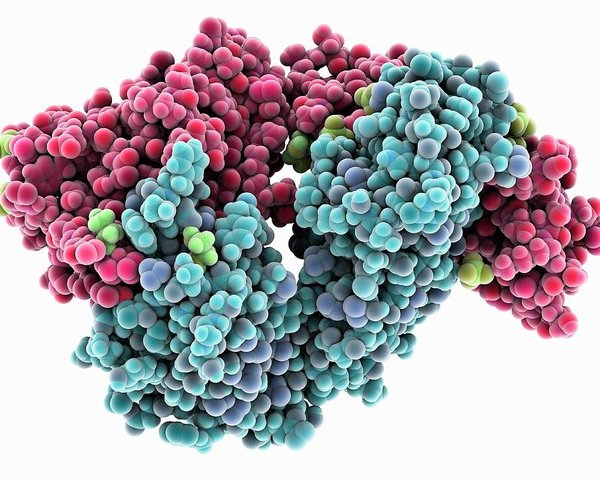

In [2]:
Image("test.jpg")

#### Background 
1. Made of chain of amino acids there are four levels of strucutres 
2. Depending on binding properties and polarity of each amino acid different secoundary structures are formed 
3. Coilical, Beta-Sheets and Alpha-Helical 

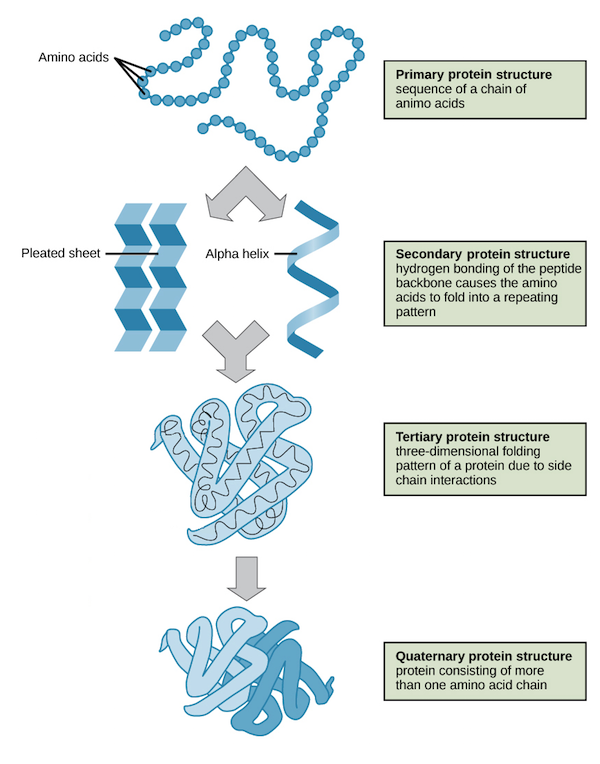

In [3]:
Image("test_2.png")

### having a large database of Proteins with anotated secondary structure lets have a little fun 

In [87]:
pat=os.path.abspath("25PDB.csv")                   #Loading Data
data=pd.read_csv(pat,header=None, index_col=None);
print('total records: '+str(data.shape))
array=pd.DataFrame(data).to_numpy()

total records: (1676, 4)


##### Lets choose random protein from the database 

In [88]:
pr=116 #protein under inversigation  

In [89]:
print('Protein under examination: '+array[pr,0])#id #seqence #sec class #desision 
print('Sequence of first 20 AA:   '+array[pr,1][0:40]+'...')
print('Anotation of first 20 AA:  '+array[pr,2][0:40]+'...')
print('Database says protein has mostly '+array[pr,3]+' structures')

Protein under examination: 1FS9A
Sequence of first 20 AA:   MTKFKLLLAGSLVAIVSMGLLASNINEREKERVALNKTAH...
Anotation of first 20 AA:  CCCCEEEHHHHHHHHHHHHHHHCCCCHHHCCCCHHCCCHH...
Database says protein has mostly a structures


seq=array[4,1]
clas=array[4,2]
for i in range(5,30):
    seq=seq+array[i,1]
    clas=clas+array[i,2]
    
print(len(seq));
#print(clas);

In [90]:
seq=array[pr,1]
clas=array[pr,2]
print('Full list of AA:')
print(seq);
print('list of anotation')
print(clas);

Full list of AA:
MTKFKLLLAGSLVAIVSMGLLASNINEREKERVALNKTAHSQGIEGKAMSEEWARYYPRQFDSWKKTKESDNITDMLKEKPALVVAWAGYPFSKDYNAPRGHYYALQDNINTLRTGAPVDGKTGPLPSACWTCKSPDVPRIIEQDGELEYFTGKWAKYGDEIVNTIGCYNCHDDKSAELKSKVPYLDRGLSAAGFKTFAESTHQEKRSLVCAQCHVEYYFKKTEWKDDKGVDKTAMVVTLPWSKGISTEQMEAYYDEINFADWTHGISKTPMLKAQHPDWELYKTGIHGQKGVSCADCHMPYTQEGAVKYSDHKVGNPLDNMDKSCMNCHRESEQKLKDIVKQKFERKEFLQDIAFDNIGKAHLETGKAMELGATDAELKEIRTHIRHAQWRADMAIAGHGSFFHAPEEVLRLLASGNEEAQKARIKLVKVLAKYGAIDYVAPDFETKEKAQKLAKVDMEAFIAEKLKFKQTLEQEWKKQAIAKGRLNPESLKGVDEKSSYYDKTKK
list of anotation
CCCCEEEHHHHHHHHHHHHHHHCCCCHHHCCCCHHCCCHHHCCCCCCCCHHHHHHHCCHHHHHHHHHHHHHHHHHHHHCCCCEEEEECCCCCCCCCCCCCCCEEHHHHHHHHHHCCCCCCHHHCCCCCEEEECCCCCHHHHHHHHCHHHHCCCCHHHHHCCCCCCCCCCCCCCCCCCCEEEECHHHHHHHHHCCCCCHHHCCHHHHHHHHHHHCEEEEEECCCCCCCCCCCCCCCCEEEECCCCCCCHHHHHHHHHCCCCCCCCCCCCCCCEEEEECCCCEEECCCCCCCCCCCEEECCCCEEECCCEEECCCCCCCCHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHHHCCEEEEEEEECCCCCCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCCEEECCCCCCHHHHHHHHHH

In [91]:
[Helic,Coli,Sheets]=AA_byType(seq,clas) #sorting each AA into one of the 3 cattegories 

In [92]:
total=len(Helic)+len(Coli)+len(Sheets) #calculating percent of each structure in the protein 
p_h=len(Helic)/total*100
p_e=len(Sheets)/total*100
p_c=len(Coli)/total*100
percentage=[p_h,p_e,p_c]

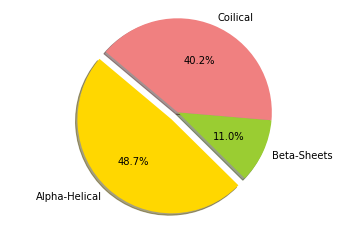

Amino Acids forming Alpha-Helical structures: 247 (48.7%)
Amino Acids forming T-turns or S-bend structures: 204 (40.2%)
Amino Acids forming Beta-Sheets structures: 56 (11.0%)


In [93]:
labels = 'Alpha-Helical', 'Beta-Sheets', 'Coilical'
sizes = percentage
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors ,autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

print('Amino Acids forming Alpha-Helical structures: '+ str(len(Helic))+' ('+str(p_h)[0:4]+'%)')
print('Amino Acids forming T-turns or S-bend structures: '+ str(len(Coli))+' ('+str(p_c)[0:4]+'%)')
print('Amino Acids forming Beta-Sheets structures: '+ str(len(Sheets))+' ('+str(p_e)[0:4]+'%)')
#https://pythonspot.com/matplotlib-pie-chart/  <--------code for cute pi-plot  

##### Lets try to determine which pairs of AA are likely to form Alpha-Helical structures and which ones would form Coilical and Beta sheets 

In [94]:
print('Seqence of Amino Acids from protein '+array[pr,0])
print(seq)
print('Labels of AA from '+ array[pr,0]+' by secondary structure  C-coils H-helix')  #C-coils H-helix
print(clas)
print('')

test_01=Double(seq,clas,'C') #Find pairs of AA that that form Coils and count in Decending Order
print('Combination of AA that form Colical Structure')
print(dict(test_01))
print('')

test_02=Double(seq,clas,'H') #Find pairs of AA that that form Helical structure and count in Decending Order
print('Combination of AA that form Helical Structure')
print(dict(test_02))

Seqence of Amino Acids from protein 1FS9A
MTKFKLLLAGSLVAIVSMGLLASNINEREKERVALNKTAHSQGIEGKAMSEEWARYYPRQFDSWKKTKESDNITDMLKEKPALVVAWAGYPFSKDYNAPRGHYYALQDNINTLRTGAPVDGKTGPLPSACWTCKSPDVPRIIEQDGELEYFTGKWAKYGDEIVNTIGCYNCHDDKSAELKSKVPYLDRGLSAAGFKTFAESTHQEKRSLVCAQCHVEYYFKKTEWKDDKGVDKTAMVVTLPWSKGISTEQMEAYYDEINFADWTHGISKTPMLKAQHPDWELYKTGIHGQKGVSCADCHMPYTQEGAVKYSDHKVGNPLDNMDKSCMNCHRESEQKLKDIVKQKFERKEFLQDIAFDNIGKAHLETGKAMELGATDAELKEIRTHIRHAQWRADMAIAGHGSFFHAPEEVLRLLASGNEEAQKARIKLVKVLAKYGAIDYVAPDFETKEKAQKLAKVDMEAFIAEKLKFKQTLEQEWKKQAIAKGRLNPESLKGVDEKSSYYDKTKK
Labels of AA from 1FS9A by secondary structure  C-coils H-helix
CCCCEEEHHHHHHHHHHHHHHHCCCCHHHCCCCHHCCCHHHCCCCCCCCHHHHHHHCCHHHHHHHHHHHHHHHHHHHHCCCCEEEEECCCCCCCCCCCCCCCEEHHHHHHHHHHCCCCCCHHHCCCCCEEEECCCCCHHHHHHHHCHHHHCCCCHHHHHCCCCCCCCCCCCCCCCCCCEEEECHHHHHHHHHCCCCCHHHCCHHHHHHHHHHHCEEEEEECCCCCCCCCCCCCCCCEEEECCCCCCCHHHHHHHHHCCCCCCCCCCCCCCCEEEEECCCCEEECCCCCCCCCCCEEECCCCEEECCCEEECCCCCCCCHHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHCCCHHHHHHHHHHH

In [ ]:
############################

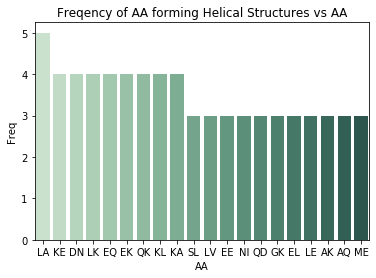

In [95]:
Plotting(test_02,'Freqency of AA forming Helical Structures vs AA')

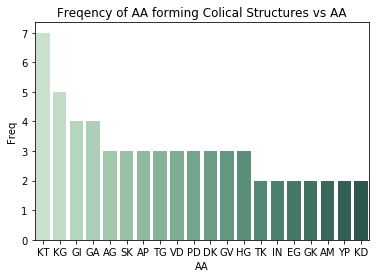

In [96]:
Plotting(test_01,'Freqency of AA forming Colical Structures vs AA')

#### # sorry Still under construction 

comb_1=np.array([])
for i in range(0,len(clas)):
    if clas[i]=='H' and clas[i-1]=='H' and clas[i+1]=='H':
        comb_1=np.append(comb_1,''.join([seq[i-1],seq[i],seq[i+1]]))
        
    

comb_1

center=np.array([])
for i in range(0,len(comb_1)):
    center=np.append(center,comb_1[i][1])
    
print(center)


unique,pos = np.unique(center,return_inverse=True) #Finds all unique elements and their positions
counts = np.bincount(pos)                     #Count the number of each unique element
maxpos = counts.argmax()                      #Finds the positions of the maximum count

#print(unique[maxpos],counts[maxpos])
t=unique[maxpos]

result = np.where(center == 'D')
print(result)

index=np.where(center == t)

H_class=pd.DataFrame(AA_1)
C_class=pd.DataFrame(AA_2)
E_class=pd.DataFrame(AA_3)

H_count=H_class.apply(pd.value_counts)
C_count=C_class.apply(pd.value_counts)
E_count=E_class.apply(pd.value_counts)

H_count=H_count/124*100
C_count=C_count/124*100
E_count=E_count/124*100


E_count=pd.DataFrame([E_count.to_list(),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], index=H_count.index)

E_count.plot(kind='bar',title='Percent of AA forming Helical structure')

H_count.index

for row in H_count.index: 
    print(row, end = " ") 

fig, ax = plt.subplots(1, 1)
H_count.plot(kind='bar',title='Percent of AA forming Helical structure',ax=ax,alpha=0.5)
C_count.plot(kind='bar',title='Percent of AA forming Helical structure',alpha=0.5,ax=ax)
#E_count.plot(kind='bar',alpha=0.5,ax=ax)

inv=[int(Dn[0][0]),int(Dn[1][0]),int(Dn[2][0]),int(Dn[3][0]),int(Dn[4][0])]

bins = np.linspace(0, 17, 10)
plt.bar([1,2,3,4,5],inv)
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
plt.show()

Dn

nums=[2,7,11,15] 
target=9

for i in range(0,len(nums)-1):
    for j in range(i+1,len(nums)):
        if (nums[i]+nums[j])==target:
            print(i)
            print(j)

In [ ]:
###################################################

In [10]:
def Plotting(test,title):
    fd=dict(test)
    hist=list(fd.values())
    kva=list(fd.keys())
    df = pd.DataFrame({'AA': kva, 'Freq': hist})
    new_df=df.head(20)
    ax = sns.barplot(x="AA", y="Freq", data=new_df,palette=("ch:2.5,-.2,dark=.3"))
    ax.set_title(title)


In [12]:
class Descending:  #class that helps sort 2d arrays 
    """ for np_sortrows: sort column in descending order """
    def __init__(self, column_index):
        self.column_index = column_index

    def __int__(self):  # when cast to integer
        return self.column_index


def np_sortrows(M, columns=None):
    """  sorting 2D matrix by rows
    :param M: 2D numpy array to be sorted by rows
    :param columns: None for all columns to be used,
                    iterable of indexes or Descending objects
    :return: returns sorted M
    """
    if len(M.shape) != 2:
        raise ValueError('M must be 2d numpy.array')
    if columns is None:  # no columns specified, use all in reversed order
        M_columns = tuple(M[:, c] for c in range(M.shape[1]-1, -1, -1))
    else:
        M_columns = []
        for c in columns:
            M_c = M[:, int(c)]
            if isinstance(c, Descending):
                M_columns.append(M_c[::-1])
            else:
                M_columns.append(M_c)
        M_columns.reverse()

    return M[np.lexsort(M_columns), :]

In [13]:
def Double(seq,clas,crf): #function finds combination of AA that are coded labeled with the same secondary structure (coil, helix) 
    lis=[]
    for i in range(len(seq)-1):
        if clas[i]==crf and clas[i+1]==crf: #if xi coding='C' and xi+1 coding='C' | coil is forming  
            lis.append(seq[i]+seq[i+1]) #append amino acids that are forming Coils 

    from collections import Counter #counting number of AA combinations 
    vd=dict(Counter(lis))

    ke=list(vd.keys())  #combinations of amino Acids 
    val=list(vd.values()) #combinations of Counts 

    c=list(range(0,len(ke)))
    dd=[val,c]
    nt=np.asarray(dd)
    nt=nt.T

    out=np_sortrows(nt, [0, Descending(1)]) #sort combinations of AA in Desending order 

    vout=[]
    for i in range(len(out)-1,0,-1):
        vout.append([ke[out[i][1]],val[out[i][1]]])
    return(vout)

In [14]:
def AA_byType(seq,clas):  #seq=GGSQ...(string)  clas=CHHH...(string)   return: [Helic,Coli,Sheets] (list)  
    count=0; count2=0; count3=0; AA_1= np.array([]);  AA_2= np.array([]);  AA_3= np.array([]); 
    for i in range(0,len(clas)):
        if clas[i]=='H':
            count=count+1;
            AA_1=np.append(AA_1,seq[i])
        elif clas[i]=='C':
            count2=count2+1;
            AA_2=np.append(AA_2,seq[i])

        elif clas[i]=='E':
            count3=count3+1;
            AA_3=np.append(AA_3,seq[i])

    return([list(AA_1),list(AA_2),list(AA_3)])